In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('realtor-data.csv')

In [3]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


In [5]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'sold_date'],
      dtype='object')

In [6]:
df['bed'] = df['bed'].fillna(df['bed'].mean())


In [7]:
df['bath'] = df['bath'].fillna(df['bath'].mean())

In [8]:
df['acre_lot'] = df['acre_lot'].fillna(df['acre_lot'].mean())

In [9]:
df['house_size'] = df['house_size'].fillna(df['house_size'].mean())

In [10]:
df = df.drop('sold_date', axis=1)

In [11]:
df.dropna(inplace=True)

<AxesSubplot:>

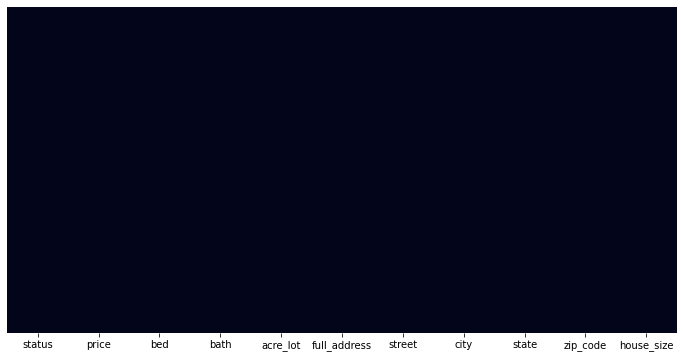

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [13]:
df['status'].value_counts()

for_sale          919165
ready_to_build      1560
Name: status, dtype: int64

In [14]:
df = df.drop('street', axis=1)

In [15]:
df['city'] =df['city'].apply(lambda x : x.strip())

In [16]:
others = df.groupby('city')['city'].agg('count').sort_values(ascending=False)  
others

city
New York City                 47517
New York                      47358
Boston                        31502
Brooklyn                      23151
Bronx                         11574
                              ...  
Carversville                      1
Mattituck                         1
Old Brookville                    1
Fletchers Landing Township        1
Nassau Village                    1
Name: city, Length: 2540, dtype: int64

In [17]:
others = others[others<500]   # as many cities are counted below 500, just making those city names as others rather than droping them
others

city
Bolton                        499
Brookfield                    499
Newtown                       497
North Smithfield              496
Carteret                      495
                             ... 
Carversville                    1
Mattituck                       1
Old Brookville                  1
Fletchers Landing Township      1
Nassau Village                  1
Name: city, Length: 2121, dtype: int64

In [18]:
df['city'] = df['city'].apply(lambda x : 'Other' if x in others else x)

In [19]:
df['city'].nunique()

420

In [20]:
df=df.drop(['full_address','zip_code'], axis=1)

In [21]:
df

,status,price,bed,bath,acre_lot,city,state,house_size
0,for_sale,105000.0,3.000000,2.000000,0.12,Other,Puerto Rico,920.000000
1,for_sale,80000.0,4.000000,2.000000,0.08,Other,Puerto Rico,1527.000000
2,for_sale,67000.0,2.000000,1.000000,0.15,Other,Puerto Rico,748.000000
3,for_sale,145000.0,4.000000,2.000000,0.10,Ponce,Puerto Rico,1800.000000
4,for_sale,65000.0,6.000000,2.000000,0.05,Other,Puerto Rico,2141.644071
...,...,...,...,...,...,...,...,...
923154,for_sale,445000.0,1.000000,2.000000,0.99,Other,New York,1052.000000
923155,for_sale,418000.0,4.000000,2.000000,0.40,Monroe,New York,1650.000000
923156,for_sale,469000.0,4.000000,2.000000,0.18,Other,New York,2123.000000
923157,for_sale,825000.0,5.000000,5.000000,0.79,Other,New York,3775.000000


In [22]:
cols = ['price', 'bed', 'bath', 'acre_lot', 'house_size']


# As there are many ouliers for each i in cols, can refer from df.describe(). removing the outliers using IQR.

for i in cols:
    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    min_value = df[df[i]<lower].index
    max_value = df[df[i]>lower].index

    if len(min_value)==0:
        pass
    else:
        min_value = df[df[i]<lower].index
        df.drop(min_value, inplace=True)
        
    if len(max_value)==0:
        pass
    else:
        max_value = df[df[i]>upper].index
        df.drop(max_value, inplace=True)


In [23]:
df.describe()

,price,bed,bath,acre_lot,house_size
count,7.559380e+05,755938.000000,755938.000000,755938.000000,755938.000000
mean,4.829300e+05,2.980214,2.110539,6.242718,1773.142050
std,3.372694e+05,1.157266,0.834120,7.979974,626.438895
min,0.000000e+00,1.000000,1.000000,0.000000,100.000000
25%,2.390000e+05,2.000000,1.000000,0.170000,1248.000000
50%,3.999790e+05,3.000000,2.000000,0.820000,2069.000000
75%,6.500000e+05,3.330352,3.000000,17.075888,2141.644071
max,1.690000e+06,7.000000,4.000000,42.410000,3459.000000


In [24]:
df.describe()

,price,bed,bath,acre_lot,house_size
count,7.559380e+05,755938.000000,755938.000000,755938.000000,755938.000000
mean,4.829300e+05,2.980214,2.110539,6.242718,1773.142050
std,3.372694e+05,1.157266,0.834120,7.979974,626.438895
min,0.000000e+00,1.000000,1.000000,0.000000,100.000000
25%,2.390000e+05,2.000000,1.000000,0.170000,1248.000000
50%,3.999790e+05,3.000000,2.000000,0.820000,2069.000000
75%,6.500000e+05,3.330352,3.000000,17.075888,2141.644071
max,1.690000e+06,7.000000,4.000000,42.410000,3459.000000


In [25]:
# Here I found that from df['price'] we have very low prices which are almost very low cost for a house. I considered
# thos prices as outliers and removed prices which are below 21000.

In [26]:
df = df[df['price'] > 21000]

In [27]:
df

,status,price,bed,bath,acre_lot,city,state,house_size
0,for_sale,105000.0,3.000000,2.000000,0.12,Other,Puerto Rico,920.000000
1,for_sale,80000.0,4.000000,2.000000,0.08,Other,Puerto Rico,1527.000000
2,for_sale,67000.0,2.000000,1.000000,0.15,Other,Puerto Rico,748.000000
3,for_sale,145000.0,4.000000,2.000000,0.10,Ponce,Puerto Rico,1800.000000
4,for_sale,65000.0,6.000000,2.000000,0.05,Other,Puerto Rico,2141.644071
...,...,...,...,...,...,...,...,...
923152,for_sale,589999.0,4.000000,3.000000,1.10,Other,New York,2214.000000
923154,for_sale,445000.0,1.000000,2.000000,0.99,Other,New York,1052.000000
923155,for_sale,418000.0,4.000000,2.000000,0.40,Monroe,New York,1650.000000
923156,for_sale,469000.0,4.000000,2.000000,0.18,Other,New York,2123.000000


In [28]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'New Jersey', 'Vermont', 'New York', 'Tennessee',
       'Rhode Island', 'Virginia', 'Wyoming', 'Maine', 'Georgia',
       'West Virginia', 'Pennsylvania', 'Delaware'], dtype=object)

In [29]:
dummies = pd.get_dummies(df[['status', 'state']], drop_first=True)
df = df.drop(['status', 'city', 'state'], axis=1)

In [30]:
df = pd.concat((df, dummies), axis=1)

In [31]:
X = df.drop('price', axis=1)
y = df['price']

In [32]:
X.columns

Index(['bed', 'bath', 'acre_lot', 'house_size', 'status_ready_to_build',
       'state_Delaware', 'state_Georgia', 'state_Maine', 'state_Massachusetts',
       'state_New Hampshire', 'state_New Jersey', 'state_New York',
       'state_Pennsylvania', 'state_Puerto Rico', 'state_Rhode Island',
       'state_Tennessee', 'state_Vermont', 'state_Virgin Islands',
       'state_Virginia', 'state_West Virginia', 'state_Wyoming'],
      dtype='object')

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
tree = DecisionTreeRegressor()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
pred = tree.predict(X_test)

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
print(r2_score(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

0.8091712425183106
65079.27055985889
147490.14856713748


In [48]:
len(X.columns)

21

In [50]:
col = X.columns

In [55]:
col =['bed', 'bath', 'acre_lot', 'house_size', 'status_ready_to_build',
       'state_Delaware', 'state_Georgia', 'state_Maine', 'state_Massachusetts',
       'state_New Hampshire', 'state_New Jersey', 'state_New York',
       'state_Pennsylvania', 'state_Puerto Rico', 'state_Rhode Island',
       'state_Tennessee', 'state_Vermont', 'state_Virgin Islands',
       'state_Virginia', 'state_West Virginia', 'state_Wyoming']

In [45]:
import pickle

In [46]:
with open('real_estate.pickle', 'wb') as f:
    pickle.dump(tree, f)

In [47]:
import json
columns ={'data_columns' : [col.lower() for col in X.columns]}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [56]:
col.index('state_New Jersey')

10